<a href="https://colab.research.google.com/github/gustavoramoss341/Event-Forecast/blob/main/deafiopython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O FAXINEIRO LEVI
O faxineiro Levi é um homem que diariamente trafega pela cidade utilizando o
transporte público, mais especificamente, os ônibus. Contudo, ele está bastante
incomodado com a falta de constância nos horários dos ônibus, pois isso tem
interferido bastante na sua rotina diária. Dito isso, enquanto esperava mais um ônibus
atrasado, a fim de não criar mais expectativas, ele se perguntou se poderia ter uma
previsão de quantos ônibus faltariam naquele respectivo dia.


Levi pediu a sua ajuda para resolver o problema que o incomoda todas as
noites. Realize duas previsões para um número máximo de 10 atrasos: a primeira,
sendo uma previsão para que os ônibus atrasem até 10 vezes no dia, e a segunda, uma
previsão para que os ônibus se atrasem exatamente 10 vezes naquele respectivo dia.
Levi também definiu que um ônibus só será considerado &quot;atrasado&quot; se ele tiver um
atraso maior que 5 minutos em relação à sua previsão de chegada.
Após os cálculos, Levi também solicita que você entregue os resultados de
forma gráfica, ou seja, faça um gráfico que relacione os dias da semana com suas
respectivas previsões (Dia X Previsão).

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/Base.csv')


In [ ]:
df_min = df
df_min['Previsão de Chegada_min'] = df['Previsão de Chegada'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
df_min['Horário de Chegada_min'] = df['Horário de Chegada'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
df_min

,Unnamed: 0,Semana,Dia,Previsão de Chegada,Horário de Chegada,Previsão de Chegada_min,Horário de Chegada_min
0,0,semana 1,seg,16:12,16:32,972,992
1,1,semana 1,seg,12:48,12:59,768,779
2,2,semana 1,seg,08:38,09:03,518,543
3,3,semana 1,seg,11:53,12:21,713,741
4,4,semana 1,seg,08:20,08:33,500,513
...,...,...,...,...,...,...,...
1208,1208,semana 5,qua,07:38,07:56,458,476
1209,1209,semana 5,qua,07:38,08:00,458,480
1210,1210,semana 5,qua,17:09,17:39,1029,1059
1211,1211,semana 5,qua,19:40,20:04,1180,1204


Usando um split, as horas foram transformadas em minutos para facilitar o cálculo, filtrando os resultados para obter um novo DF, onde a diferença da previsão de chegada e do horário de chegada é maior que 5 minutos, ou seja, um DF apenas dos onibus que atrasaram.

In [ ]:
df_min_dif = df_min.loc[(df_min['Horário de Chegada_min']- df_min['Previsão de Chegada_min']) > 5]
df_min_dif.head(10)

,Unnamed: 0,Semana,Dia,Previsão de Chegada,Horário de Chegada,Previsão de Chegada_min,Horário de Chegada_min
0,0,semana 1,seg,16:12,16:32,972,992
1,1,semana 1,seg,12:48,12:59,768,779
2,2,semana 1,seg,08:38,09:03,518,543
3,3,semana 1,seg,11:53,12:21,713,741
4,4,semana 1,seg,08:20,08:33,500,513
5,5,semana 1,seg,08:45,09:07,525,547
6,6,semana 1,seg,13:39,14:06,819,846
7,7,semana 1,seg,08:29,08:46,509,526
9,9,semana 1,seg,10:52,11:20,652,680
11,11,semana 1,seg,06:29,06:40,389,400


In [ ]:
#-------SEGUNDAS--------
segundas_atrasado = df_min_dif [df_min_dif['Dia'] == 'seg']
qtd_segundas_atrasados = len(segundas_atrasado)
media_segundas = qtd_segundas_atrasados/5
print(media_segundas)

#-------TERÇAS--------
tercas_atrasado = df_min_dif [df_min_dif['Dia'] == 'ter']
qtd_tercas_atrasados = len(tercas_atrasado)
media_tercas = qtd_tercas_atrasados/5
print(media_tercas)

#-------QUARTAS--------
quartas_atrasado = df_min_dif [df_min_dif['Dia'] == 'qua']
qtd_quartas_atrasados = len(quartas_atrasado)
media_quartas = qtd_quartas_atrasados/5
print(media_quartas)

#-------QUINTAS--------
quintas_atrasado = df_min_dif [df_min_dif['Dia'] == 'qui']
qtd_quintas_atrasados = len(quintas_atrasado)
media_quintas = qtd_quintas_atrasados/4
print(media_quintas)

#-------SEXTAS--------
sextas_atrasado = df_min_dif [df_min_dif['Dia'] == 'sex']
qtd_sextas_atrasados = len(sextas_atrasado)
media_sextas = qtd_sextas_atrasados/4
print(media_sextas)

#-------SÁBADO--------
sabados_atrasado = df_min_dif [df_min_dif['Dia'] == 'sab']
qtd_sabados_atrasados = len(sabados_atrasado)
media_sabados = qtd_sabados_atrasados/4
print(media_sabados)

#-------DOMINGO--------
domingo_atrasado = df_min_dif [df_min_dif['Dia'] == 'dom']
qtd_domingo_atrasados = len(domingo_atrasado)
media_domingos = qtd_domingo_atrasados/4
print(media_domingos)





30.0
26.4
29.4
34.5
34.0
30.25
38.25


In [ ]:

def distribuicao_poisson(l: float, k: int) -> float:
    return ((l**k) * np.exp(-l)) / math.factorial(k)

#---------CHANCE SEGUNDA---------
print("----Segundas----")
probabilidade_sgd = distribuicao_poisson(media_segundas,20)
probabilidade_sgd_ate20 = sum(distribuicao_poisson(media_segundas,20) for k in range(21))
print(probabilidade_sgd*100)
print(probabilidade_sgd_ate20*100)


#---------CHANCE TERÇA---------
print("----Terça----")
probabilidade_ter = distribuicao_poisson(media_tercas,20)
probabilidade_ter_ate20 = sum(distribuicao_poisson(media_tercas,20) for k in range(21))
print(probabilidade_ter*100)
print(probabilidade_ter_ate20*100)

#---------CHANCE QUARTA---------
print("----Quarta----")
probabilidade_qua = distribuicao_poisson(media_quartas,20)
probabilidade_qua_ate20 = sum(distribuicao_poisson(media_quartas,20) for k in range(21))
print(probabilidade_qua*100)
print(probabilidade_qua_ate20*100)

#---------CHANCE QUINTA---------
print("----Quinta----")
probabilidade_qui = distribuicao_poisson(media_quintas,20)
probabilidade_qui_ate20 = sum(distribuicao_poisson(media_quintas,20) for k in range(21))
print(probabilidade_qui*100)
print(probabilidade_qui_ate20*100)

#---------CHANCE SEXTA---------
print("----Sexta----")
probabilidade_sex = distribuicao_poisson(media_sextas,20)
probabilidade_sex_ate20 = sum(distribuicao_poisson(media_sextas,20) for k in range(21))
print(probabilidade_sex*100)
print(probabilidade_sex_ate20*100)

#---------CHANCE SÁBADO---------
print("----Sabádo----")
probabilidade_sab = distribuicao_poisson(media_sabados,20)
probabilidade_sab_ate20 = sum(distribuicao_poisson(media_sabados,20) for k in range(21))
print(probabilidade_sab*100)
print(probabilidade_sab_ate20*100)

#---------CHANCE DOMINGO---------
print("----Domingo----")
probabilidade_dom = distribuicao_poisson(media_domingos,20)
probabilidade_dom_ate20 = sum(distribuicao_poisson(media_domingos,20) for k in range(21))
print(probabilidade_dom*100)
print(probabilidade_dom_ate20*100)


----Segundas----
1.341115001283779
28.163415026959353
----Terça----
3.806971260607329
79.9463964727539
----Quarta----
1.6314141446957204
34.25969703861012
----Quinta----
0.24383590656176252
5.120554037797011
----Sexta----
0.30022118806534087
6.304644949372158
----Sabádo----
1.2330335264525405
25.893704055503342
----Domingo----
0.04515857614508676
0.9483300990468216


# Probabilidades

Usando a probabilidade de poisson, é possível calcular a probabilidade de um evento acontecer, quando se sabe as ocorrências anteriores, utilizando a média, que é calculada a partir da divisão do número de ocorrencias totais, pelo número de atrasos.

No primeiro calculo, aplica-se a média e o número exatos de ventos que espera-se que ocorra(20), já que é um número fixo.

No segundo calculo é feito uma soma de probabilidades, baseado no que o problema pede, para calcular a probabilidade de ocorrência na faixa de valores que o problema informa.

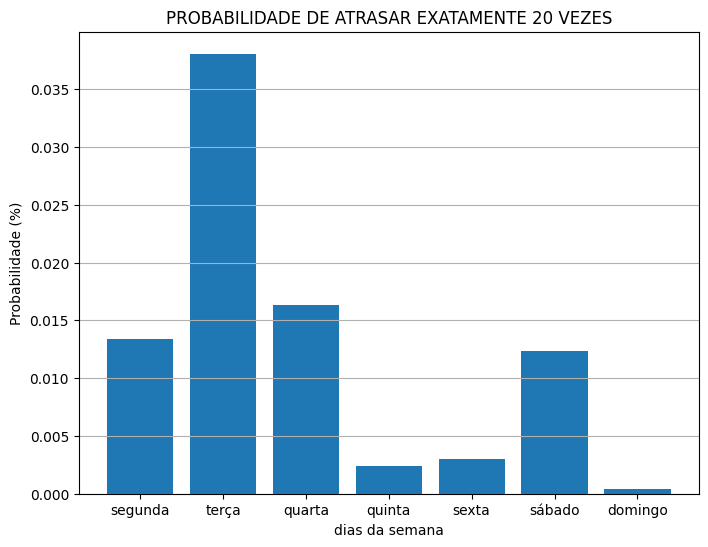

In [ ]:
plt.figure(figsize=(8,6))

x = ['segunda','terça','quarta','quinta','sexta','sábado','domingo']
y1 = [probabilidade_sgd,probabilidade_ter,probabilidade_qua,probabilidade_qui,probabilidade_sex,probabilidade_sab,probabilidade_dom]

plt.bar(x,y1)

plt.title('PROBABILIDADE DE ATRASAR EXATAMENTE 20 VEZES')
plt.xlabel('dias da semana')
plt.ylabel('Probabilidade (%)')
plt.grid(True, axis='y')
plt.show()

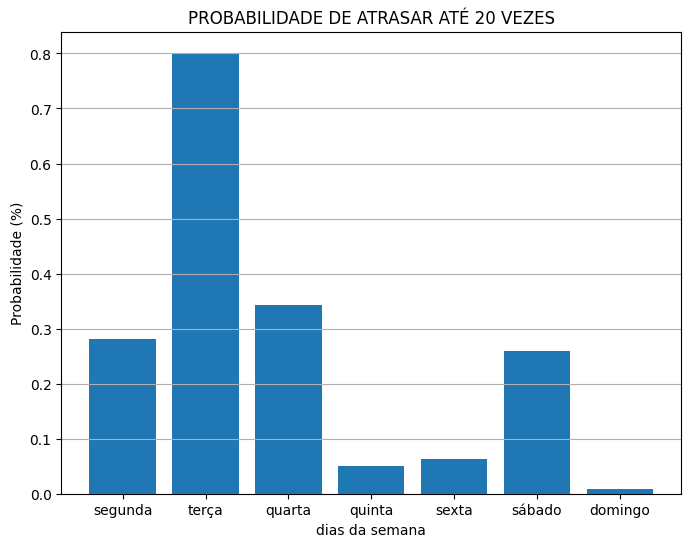

In [ ]:
plt.figure(figsize=(8,6))

x = ['segunda','terça','quarta','quinta','sexta','sábado','domingo']
y1 = [probabilidade_sgd_ate20,probabilidade_ter_ate20,probabilidade_qua_ate20,probabilidade_qui_ate20,probabilidade_sex_ate20,probabilidade_sab_ate20,probabilidade_dom_ate20]

plt.bar(x,y1)

plt.title('PROBABILIDADE DE ATRASAR ATÉ 20 VEZES')
plt.xlabel('dias da semana')
plt.ylabel('Probabilidade (%)')
plt.grid(True, axis='y')
plt.show()